In [32]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
#import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
from random import randint

In [33]:
df = pd.read_csv('AMD.csv')
df['Date'] = pd.to_datetime(df['Date'])

cut_off_date = '2010-01-01' 
df = df[df['Date'] >= cut_off_date]


df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
7518,2010-01-04,9.79,9.90,9.68,9.70,9.70,18748700
7519,2010-01-05,9.71,9.90,9.68,9.71,9.71,22145700
7520,2010-01-06,9.68,9.76,9.55,9.57,9.57,18643400
7521,2010-01-07,9.51,9.55,9.18,9.47,9.47,26806800
7522,2010-01-08,9.37,9.47,9.29,9.43,9.43,13752800


In [34]:
# take random sets of sequential rows 
new_set = []
for row_set in range(0, 100000):
    if row_set%2000==0: print(row_set)
    row_quant = randint(10, 30)
    row_start = randint(0, len(df)-row_quant)
    market_subset = df.iloc[row_start:row_start+row_quant]

    Close_Date = max(market_subset['Date'])
    if row_set%2000==0: print(Close_Date)
    
    # Close_Gap = (market_subset['Close'] - market_subset['Close'].shift(1)) / market_subset['Close'].shift(1)
    Close_Gap = market_subset['Close'].pct_change()
    High_Gap = market_subset['High'].pct_change()
    Low_Gap = market_subset['Low'].pct_change() 
    Volume_Gap = market_subset['Volume'].pct_change() 
    Daily_Change = (market_subset['Close'] - market_subset['Open']) / market_subset['Open']
    Outcome_Next_Day_Direction = (market_subset['Volume'].shift(-1) - market_subset['Volume'])
    
    new_set.append(pd.DataFrame({'Sequence_ID':[row_set]*len(market_subset),
                            'Close_Date':[Close_Date]*len(market_subset),
                           'Close_Gap':Close_Gap,
                           'High_Gap':High_Gap,
                           'Low_Gap':Low_Gap,
                           'Volume_Gap':Volume_Gap,
                           'Daily_Change':Daily_Change,
                           'Outcome_Next_Day_Direction':Outcome_Next_Day_Direction}))

0
2018-11-09 00:00:00
2000
2022-08-11 00:00:00
4000
2022-01-06 00:00:00
6000
2023-04-12 00:00:00
8000
2015-06-23 00:00:00
10000
2015-05-22 00:00:00
12000
2022-03-31 00:00:00
14000
2011-07-15 00:00:00
16000
2015-12-09 00:00:00
18000
2022-10-10 00:00:00
20000
2018-08-03 00:00:00
22000
2017-12-22 00:00:00
24000
2023-01-27 00:00:00
26000
2022-05-05 00:00:00
28000
2018-08-06 00:00:00
30000
2020-12-14 00:00:00
32000
2015-11-02 00:00:00
34000
2017-01-25 00:00:00
36000
2023-05-03 00:00:00
38000
2017-04-27 00:00:00
40000
2021-08-06 00:00:00
42000
2022-07-05 00:00:00
44000
2011-11-28 00:00:00
46000
2020-01-27 00:00:00
48000
2014-09-04 00:00:00
50000
2014-03-03 00:00:00
52000
2019-12-11 00:00:00
54000
2021-04-13 00:00:00
56000
2010-09-27 00:00:00
58000
2018-08-13 00:00:00
60000
2020-12-08 00:00:00
62000
2017-09-11 00:00:00
64000
2013-09-19 00:00:00
66000
2018-07-30 00:00:00
68000
2016-04-14 00:00:00
70000
2013-10-10 00:00:00
72000
2020-01-06 00:00:00
74000
2013-11-25 00:00:00
76000
2018-01-08 00:

In [35]:
new_set_df = pd.concat(new_set)
print(new_set_df.shape)
new_set_df = new_set_df.dropna(how='any') 
print(new_set_df.shape)
new_set_df.tail(20)

(2000570, 8)
(1800570, 8)


,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
8028,99999,2012-02-09,0.017513,0.015652,0.007092,0.105305,0.022887,283800.0
8029,99999,2012-02-09,0.001721,0.001712,0.005282,0.025348,-0.001715,-1809200.0
8030,99999,2012-02-09,-0.027491,-0.010256,-0.014011,-0.157594,-0.017361,-1411000.0
8031,99999,2012-02-09,0.012367,0.008636,0.014210,-0.145902,-0.006932,11695900.0
8032,99999,2012-02-09,0.041885,0.032534,0.003503,1.415986,0.041885,1775500.0
8033,99999,2012-02-09,0.041876,0.034826,0.043630,0.088972,0.033223,6975000.0
8034,99999,2012-02-09,0.032154,0.040064,0.033445,0.320966,0.032154,-6787900.0
8035,99999,2012-02-09,0.015576,0.016949,0.033981,-0.236460,0.015576,16872100.0
8036,99999,2012-02-09,0.001534,0.031818,0.000000,0.769769,0.009274,-2005500.0
8037,99999,2012-02-09,0.030628,-0.004405,-0.025039,-0.051701,0.071656,-11624400.0


In [36]:
# Close_Gap
new_set_df['Close_Gap_LMH'] = pd.qcut(new_set_df['Close_Gap'], 3, labels=["L", "M", "H"])

# High_Gap - not used in this example
new_set_df['High_Gap_LMH'] = pd.qcut(new_set_df['High_Gap'], 3, labels=["L", "M", "H"])

# Low_Gap - not used in this example
new_set_df['Low_Gap_LMH'] = pd.qcut(new_set_df['Low_Gap'], 3, labels=["L", "M", "H"])

# Volume_Gap
new_set_df['Volume_Gap_LMH'] = pd.qcut(new_set_df['Volume_Gap'], 3, labels=["L", "M", "H"])
 
# Daily_Change
new_set_df['Daily_Change_LMH'] = pd.qcut(new_set_df['Daily_Change'], 3, labels=["L", "M", "H"])



C:\Users\Josh\anaconda3\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction,Close_Gap_LMH,High_Gap_LMH,Low_Gap_LMH,Volume_Gap_LMH,Daily_Change_LMH
9724,0,2018-11-09,-0.032541,-0.032666,-0.036019,0.179312,-0.010101,1672300.0,L,L,L,H,M
9725,0,2018-11-09,0.029478,0.006173,0.001541,0.016112,0.041683,42221100.0,H,M,M,M,H
9726,0,2018-11-09,-0.082232,-0.011187,-0.041923,0.400345,-0.086925,-669100.0,L,L,L,H,L
9727,0,2018-11-09,0.012000,-0.043796,-0.014452,-0.004531,0.022635,-35954400.0,H,L,L,M,H
9728,0,2018-11-09,0.041107,0.029389,0.045621,-0.244565,-0.016063,-40535900.0,H,H,H,L,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8043,99999,2012-02-09,0.004348,0.011561,0.005882,0.075184,0.004348,-457100.0,M,H,M,M,M
8044,99999,2012-02-09,0.021645,0.017143,0.020468,-0.028976,0.008547,-2173300.0,H,H,H,M,M
8045,99999,2012-02-09,-0.022599,-0.009831,-0.011461,-0.141878,-0.014245,5728700.0,L,L,L,M,L
8046,99999,2012-02-09,0.030347,0.019858,0.007246,0.435815,0.024425,-3267500.0,H,H,M,H,H


In [40]:
new_set_df[new_set_df["Close_Gap_LMH"]=="H"].describe()

,Sequence_ID,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
count,600009.000000,600009.000000,600009.000000,600009.000000,600009.000000,600009.000000,6.000090e+05
mean,49947.932138,0.035940,0.023720,0.020699,0.216424,0.026137,-1.244013e+06
std,28857.125666,0.028889,0.034266,0.026034,0.669499,0.024039,2.330109e+07
min,0.000000,0.011983,-0.065188,-0.051458,-0.702617,-0.054893,-1.154594e+08
25%,24958.000000,0.018692,0.005013,0.004717,-0.144576,0.010925,-9.929300e+06
50%,49914.000000,0.027563,0.019900,0.016585,0.050042,0.022021,-1.818800e+06
75%,74902.000000,0.042553,0.036508,0.033333,0.360791,0.036685,5.679600e+06
max,99999.000000,0.522901,0.477778,0.223077,9.264616,0.250784,2.003002e+08


In [7]:
# create sequences
# simplify the data by binning values into three groups
 
# Close_Gap
new_set_df['Close_Gap_LMH'] = pd.qcut(new_set_df['Close_Gap'], 3, labels=["L", "M", "H"])

# High_Gap - not used in this example
new_set_df['High_Gap_LMH'] = pd.qcut(new_set_df['High_Gap'], 3, labels=["L", "M", "H"])

# Low_Gap - not used in this example
new_set_df['Low_Gap_LMH'] = pd.qcut(new_set_df['Low_Gap'], 3, labels=["L", "M", "H"])

# Volume_Gap
new_set_df['Volume_Gap_LMH'] = pd.qcut(new_set_df['Volume_Gap'], 3, labels=["L", "M", "H"])
 
# Daily_Change
new_set_df['Daily_Change_LMH'] = pd.qcut(new_set_df['Daily_Change'], 3, labels=["L", "M", "H"])

# new set
new_set_df = new_set_df[["Sequence_ID", 
                         "Close_Date", 
                         "Close_Gap_LMH", 
                         "Volume_Gap_LMH", 
                         "Daily_Change_LMH", 
                         "Outcome_Next_Day_Direction"]]

new_set_df['Event_Pattern'] = new_set_df['Close_Gap_LMH'].astype(str) + new_set_df['Volume_Gap_LMH'].astype(str) + new_set_df['Daily_Change_LMH'].astype(str)
 

C:\Users\Josh\anaconda3\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [8]:
new_set_df.tail(10)

,Sequence_ID,Close_Date,Close_Gap_LMH,Volume_Gap_LMH,Daily_Change_LMH,Outcome_Next_Day_Direction,Event_Pattern
7854,99999,2011-05-18,M,M,M,-2152800.0,MMM
7855,99999,2011-05-18,M,M,H,2747100.0,MMH
7856,99999,2011-05-18,M,H,M,-7952600.0,MHM
7857,99999,2011-05-18,M,L,M,5559600.0,MLM
7858,99999,2011-05-18,M,H,H,-157600.0,MHH
7859,99999,2011-05-18,M,M,M,2366400.0,MMM
7860,99999,2011-05-18,M,H,H,-4379800.0,MHH
7861,99999,2011-05-18,M,L,M,3698000.0,MLM
7862,99999,2011-05-18,L,H,L,3444400.0,LHL
7863,99999,2011-05-18,L,H,M,-2063400.0,LHM


In [10]:
# reduce the set
compressed_set = new_set_df.groupby(['Sequence_ID', 
                                     'Close_Date'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()

print(compressed_set.shape)
compressed_set.head() 

(100000, 3)


,Sequence_ID,Close_Date,Event_Pattern
0,0,2018-05-31,"{HHH, HHH, MLH, HHH, HMH, LMM, HHM, HMH, HHH, ..."
1,1,2019-01-24,"{LMM, LML, LLM, HHH, LMM, HMH, HLH, HMH, LHL, ..."
2,2,2012-11-23,"{LML, HLH, LLL, MML, HHH, LML, MMM, LHL, LHL, ..."
3,3,2019-10-29,"{MMM, MMM, HHH, LLL, MLM, MMM, HHH, HHH}"
4,4,2014-07-02,"{MLM, MMM, HHH, HLH, MHM, MLL, HHH, MLH, LLL, ..."


In [11]:
compressed_outcomes = new_set_df.groupby(['Sequence_ID', 'Close_Date'])['Outcome_Next_Day_Direction'].mean()
compressed_outcomes = compressed_outcomes.to_frame().reset_index()
print(compressed_outcomes.shape)
compressed_outcomes.describe()

(100000, 3)


,Sequence_ID,Outcome_Next_Day_Direction
count,100000.000000,1.000000e+05
mean,49999.500000,1.999899e+04
std,28867.657797,2.237260e+06
min,0.000000,-2.521371e+07
25%,24999.750000,-7.270562e+05
50%,49999.500000,-2.350417e+04
75%,74999.250000,6.974056e+05
max,99999.000000,2.986759e+07


In [12]:
compressed_set = pd.merge(compressed_set, compressed_outcomes, on= ['Sequence_ID', 'Close_Date'], how='inner')
print(compressed_set.shape)
compressed_set.head()

(100000, 4)


,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2018-05-31,"{HHH, HHH, MLH, HHH, HMH, LMM, HHM, HMH, HHH, ...",-6.040000e+04
1,1,2019-01-24,"{LMM, LML, LLM, HHH, LMM, HMH, HLH, HMH, LHL, ...",-9.982318e+05
2,2,2012-11-23,"{LML, HLH, LLL, MML, HHH, LML, MMM, LHL, LHL, ...",-1.513521e+06
3,3,2019-10-29,"{MMM, MMM, HHH, LLL, MLM, MMM, HHH, HHH}",5.226962e+06
4,4,2014-07-02,"{MLM, MMM, HHH, HLH, MHM, MLL, HHH, MLH, LLL, ...",6.678056e+05


In [13]:
compressed_set['Event_Pattern'] = [''.join(e.split()).replace('{','')
                                   .replace('}','') for e in compressed_set['Event_Pattern'].values]
compressed_set.head()

,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2018-05-31,"HHH,HHH,MLH,HHH,HMH,LMM,HHM,HMH,HHH,MLM,HHM,MM...",-6.040000e+04
1,1,2019-01-24,"LMM,LML,LLM,HHH,LMM,HMH,HLH,HMH,LHL,HMH,HMH,MH...",-9.982318e+05
2,2,2012-11-23,"LML,HLH,LLL,MML,HHH,LML,MMM,LHL,LHL,LHL,HMH,LL...",-1.513521e+06
3,3,2019-10-29,"MMM,MMM,HHH,LLL,MLM,MMM,HHH,HHH",5.226962e+06
4,4,2014-07-02,"MLM,MMM,HHH,HLH,MHM,MLL,HHH,MLH,LLL,MLL,LHL,LM...",6.678056e+05


In [14]:
# use last x days of data for validation
compressed_set_validation = compressed_set[compressed_set['Close_Date'] >= datetime.datetime.now() 
                                           - datetime.timedelta(days=90)] # Sys.Date()-90 

compressed_set_validation.shape

(1695, 4)

In [15]:
compressed_set = compressed_set[compressed_set['Close_Date'] < datetime.datetime.now() 
                                           - datetime.timedelta(days=90)]  
compressed_set.shape

(98305, 4)

In [16]:
list(compressed_set)

['Sequence_ID', 'Close_Date', 'Event_Pattern', 'Outcome_Next_Day_Direction']

In [17]:
# drop date field
compressed_set = compressed_set[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]
compressed_set_validation = compressed_set_validation[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]

In [18]:
# keep only keep big/interesting moves 
print('all moves:', len(compressed_set))
compressed_set = compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000]
compressed_set['Outcome_Next_Day_Direction'] = np.where((compressed_set['Outcome_Next_Day_Direction'] > 0), 1, 0)
compressed_set_validation['Outcome_Next_Day_Direction'] = np.where((compressed_set_validation['Outcome_Next_Day_Direction'] > 0), 1, 0)
print('big moves only:', len(compressed_set))    

all moves: 98305
big moves only: 714


In [19]:
compressed_set.head()

,Sequence_ID,Event_Pattern,Outcome_Next_Day_Direction
194,194,"LHL,LLL,HLH,LML,MML,HMH,HHH,HLM",0
624,624,"LHL,MLH,LLL,MLM,LLL,HHH,HHH,HMH,HLM,HMM,HHH,LM...",0
834,834,"HHH,HHH,HHM,HLM,LHL,LLH,LLL,LLL,LHH,MML,HMH,HHH",1
861,861,"HHL,LLL,LLM,LML,MLM,LHL,MLL,MHM,HMM,LLL,LHM,LH...",0
1021,1021,"HHH,MLM,MLL,LMM,LHL,HLH,MLM,MML,LML,HHM,LML,MLM",0


In [20]:
# create two data sets - won/not won
compressed_set_pos = compressed_set[compressed_set['Outcome_Next_Day_Direction']==1][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_pos.shape)
compressed_set_neg = compressed_set[compressed_set['Outcome_Next_Day_Direction']==0][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_neg.shape)

(425, 2)
(289, 2)


In [21]:
flat_list = [item.split(',') for item in compressed_set['Event_Pattern'].values ]
unique_patterns = ','.join(str(r) for v in flat_list for r in v)
unique_patterns = list(set(unique_patterns.split(',')))
len(unique_patterns)

27

In [22]:
compressed_set['Outcome_Next_Day_Direction'].head()     

194     0
624     0
834     1
861     0
1021    0
Name: Outcome_Next_Day_Direction, dtype: int32

In [26]:
# build the markov transition grid
def build_transition_grid(compressed_grid, unique_patterns):
    # build the markov transition grid

    patterns = []
    counts = []
    for from_event in unique_patterns:

        # how many times 
        for to_event in unique_patterns:
            pattern = from_event + ',' + to_event # MMM,MlM

            ids_matches = compressed_grid[compressed_grid['Event_Pattern'].str.contains(pattern)]
            found = 0
            if len(ids_matches) > 0:
                Event_Pattern = '---'.join(ids_matches['Event_Pattern'].values)
                found = Event_Pattern.count(pattern)
            patterns.append(pattern)
            counts.append(found)

    # create to/from grid
    grid_Df = pd.DataFrame({'pairs':patterns, 'counts': counts})

    grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(',', 1).str
    grid_Df.head()

    grid_Df = grid_Df.pivot(index='x', columns='y', values='counts')

    grid_Df.columns= [col for col in grid_Df.columns]
    #del grid_Df.index.name

    # replace all NaN with zeros
    grid_Df.fillna(0, inplace=True)
    grid_Df.head()

    #grid_Df.rowSums(transition_dataframe) 
    grid_Df = grid_Df / grid_Df.sum(1)
    return (grid_Df)

In [27]:
grid_pos = build_transition_grid(compressed_set_pos, unique_patterns) 
grid_neg = build_transition_grid(compressed_set_neg, unique_patterns) 

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_56636\3562671906.py:24: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(',', 1).str
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_56636\3562671906.py:24: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(',', 1).str
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_56636\3562671906.py:24: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(',', 1).str
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_56636\3562671906.py:24: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  grid_Df['x'], grid_Df[

In [28]:
grid_neg.head()

,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
x,,,,,,,,,,,,,,,,,,,,,
HHH,0.077348,0.441176,0.0,0.085427,0.0,0.242424,0.188889,1.0,0.096774,0.0,...,0.102564,0.0,NaN,0.057143,0.048780,0.361905,0.158228,0.0,0.00000,0.242424
HHL,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000
HHM,0.000000,0.000000,0.0,0.070352,0.0,0.045455,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,NaN,0.000000,0.036585,0.000000,0.015823,0.0,0.00000,0.000000
HLH,0.016575,0.000000,0.0,0.055276,0.0,0.000000,0.038889,0.0,0.000000,0.0,...,0.000000,0.0,inf,0.000000,0.231707,0.000000,0.050633,0.0,0.10219,0.007576
HLL,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,NaN,0.000000,0.000000,0.000000,0.006329,0.0,0.00000,0.000000


In [29]:
def safe_log(x,y):
   try:
      lg = np.log(x/y)
   except:
      lg = 0
   return lg

# predict on out of sample data
actual = []
predicted = []
for seq_id in compressed_set_validation['Sequence_ID'].values:
    patterns = compressed_set_validation[compressed_set_validation['Sequence_ID'] == seq_id]['Event_Pattern'].values[0].split(',')
    pos = []
    neg = []
    log_odds = []
    
    for id in range(0, len(patterns)-1):
        # get log odds
        # logOdds = log(tp(i,j) / tn(i,j)
        if (patterns[id] in list(grid_pos) and patterns[id+1] in list(grid_pos) and patterns[id] in list(grid_neg) and patterns[id+1] in list(grid_neg)):
                
            numerator = grid_pos[patterns[id]][patterns[id+1]]
            denominator = grid_neg[patterns[id]][patterns[id+1]]
            if (numerator == 0 and denominator == 0):
                log_value =0
            elif (denominator == 0):
                log_value = np.log(numerator / 0.00001)
            elif (numerator == 0):
                log_value = np.log(0.00001 / denominator)
            else:
                log_value = np.log(numerator/denominator)
        else:
            log_value = 0
        
        log_odds.append(log_value)
        
        pos.append(numerator)
        neg.append(denominator)
      
#     print('outcome:', compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
#     print(sum(pos)/sum(neg))
#     print(sum(log_odds))

    actual.append(compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    predicted.append(sum(log_odds))

from sklearn.metrics import confusion_matrix

confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])

array([[538, 304],
       [403, 450]], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score
score = accuracy_score(actual, [1 if p > 0 else 0 for p in predicted])
print('Accuracy:', round(score * 100,2), '%')

Accuracy: 58.29 %


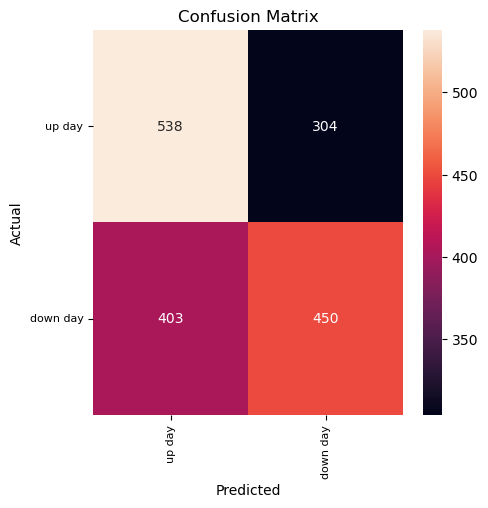

In [31]:
import seaborn as sns
cm = confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g')

ax.set_title('Confusion Matrix') 
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['up day','down day'])
ax.yaxis.set_ticklabels(['up day','down day'])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)  
plt.show()